RAW Data Visualization

In [80]:
# imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [81]:
data_file_path = "out.csv" # Load generated data

data_frame = pd.read_csv(data_file_path, header=None)
data_frame.head

<bound method NDFrame.head of              0
0     1.000000
1     1.004857
2     1.009840
3     1.014706
4     1.019423
...        ...
6995  1.434658
6996  1.433740
6997  1.432675
6998  1.431587
6999  1.430651

[7000 rows x 1 columns]>

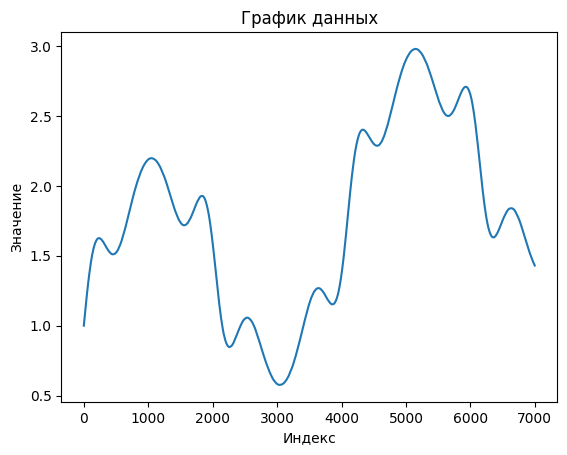

In [82]:
plt.plot(data_frame[0])

plt.title('График данных')
plt.xlabel('Индекс')
plt.ylabel('Значение')

plt.show()

Data processing
[Train data|Test data] (80%|20%)

In [83]:
from sklearn.model_selection import train_test_split

raw = data_frame[0].to_numpy()

look_back = 20

train_data, test_data = train_test_split(raw, test_size=0.2, shuffle=False)

print(f"Размер обучающей выборки: {len(train_data)}")
print(f"Размер тестовой выборки: {len(test_data)}")

Размер обучающей выборки: 5600
Размер тестовой выборки: 1400


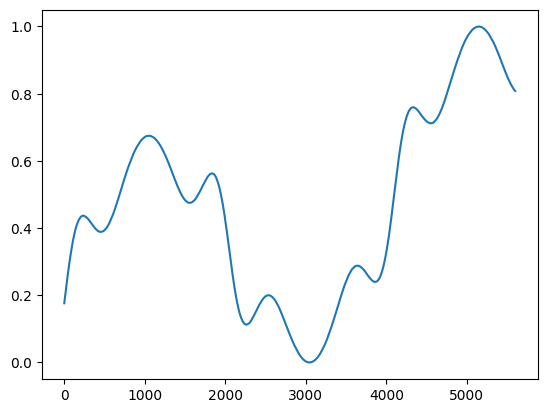

In [84]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))
train = train_data.reshape(-1, 1)
train_scaled = scaler.fit_transform(train)

test = test_data.reshape(-1, 1)
test_scaled = scaler.fit_transform(test)

plt.plot(train_scaled)

In [85]:
def create_dataset(data, look_back):
    x, y = [], []
    for i in range(len(data) - look_back):
        x.append(data[i:i + look_back])
        y.append(data[i + look_back])
    return np.array(x), np.array(y)

In [86]:
train_x, train_y = create_dataset(train_scaled, look_back)
test_x, test_y = create_dataset(test_scaled, look_back)  

train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))

print("Train X shape:", train_x.shape)
print("Test X shape:", test_x.shape)

Train X shape: (5580, 1, 20)
Test X shape: (1380, 1, 20)


Create RNN model

In [87]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator 

# Преобразуем данные в последовательности для обучения
train_generator = TimeseriesGenerator(train_x, train_y, length=look_back, batch_size=32)
test_generator = TimeseriesGenerator(test_x, test_y, length=look_back, batch_size=32)

train_x.shape

(5580, 1, 20)

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

model_rnn = Sequential()

model_rnn.add(SimpleRNN(50, activation='relu', input_shape=(1, look_back)))
model_rnn.add(Dense(1))

model_rnn.compile(optimizer='adam', loss='mean_squared_error')
model_rnn.summary()

/home/mukiva/dev/rnn-performance-test/python/rnn_performance_test/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_20 (SimpleRNN)       │ (None, 50)             │         3,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,601 (14.07 KB)

 Trainable params: 3,601 (14.07 KB)

 Non-trainable params: 0 (0.00 B)

Create LSTM model

In [89]:
from tensorflow.keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(1, look_back)))
model_lstm.add(Dense(1))

model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 50)             │        14,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,251 (55.67 KB)

 Trainable params: 14,251 (55.67 KB)

 Non-trainable params: 0 (0.00 B)

Create GRU model

In [90]:
from tensorflow.keras.layers import GRU

model_gru = Sequential()
model_gru.add(GRU(50, activation='relu', input_shape=(1, look_back)))
model_gru.add(Dense(1))

model_gru.compile(optimizer='adam', loss='mean_squared_error')

model_gru.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                     │ (None, 50)             │        10,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,851 (42.39 KB)

 Trainable params: 10,851 (42.39 KB)

 Non-trainable params: 0 (0.00 B)

Create BiRNN model

In [91]:
from tensorflow.keras.layers import Bidirectional

model_birnn = Sequential()
model_birnn.add(Bidirectional(SimpleRNN(50), input_shape=(1, look_back)))
model_birnn.add(Dense(1))

model_birnn.compile(
    optimizer='adam', 
    loss='mean_squared_error'
)
model_birnn.summary()

/home/mukiva/dev/rnn-performance-test/python/rnn_performance_test/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional) │ (None, 100)            │         7,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,201 (28.13 KB)

 Trainable params: 7,201 (28.13 KB)

 Non-trainable params: 0 (0.00 B)

Fit models

In [ ]:
import time

# Обучаем каждую модель
start_fit_time_rnn = time.time()
model_rnn.fit(train_x, train_y, epochs=50, batch_size=1, validation_data=(test_x, test_y))
end_fit_time_rnn = time.time()

start_fit_time_lstm = time.time()
model_lstm.fit(train_x, train_y, epochs=50, batch_size=1, validation_data=(test_x, test_y))
end_fit_time_lstm = time.time()

start_fit_time_gru = time.time()
model_gru.fit(train_x, train_y, epochs=50, batch_size=1, validation_data=(test_x, test_y))
end_fit_time_gru = time.time()

start_fit_time_birnn = time.time()
model_birnn.fit(train_x, train_y, epochs=50, batch_size=1, validation_data=(test_x, test_y))
end_fit_time_birnn = time.time()

Epoch 1/50
5580/5580 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.0017 - val_loss: 1.3885e-04
Epoch 2/50
5580/5580 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 1.7414e-04 - val_loss: 5.0779e-05
Epoch 3/50
5580/5580 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 9.0294e-05 - val_loss: 6.1128e-05
Epoch 4/50
5580/5580 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 5.8192e-05 - val_loss: 1.8591e-04
Epoch 5/50
5580/5580 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 4.3716e-05 - val_loss: 7.7035e-05
Epoch 6/50
1999/5580 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 3.6621e-05

Metrics

In [118]:
training_time_rnn = end_fit_time_rnn - start_fit_time_rnn
print("RNN")
print(f"Время обучения: {training_time_rnn:.2f} секунд")

training_time_lstm = end_fit_time_lstm - start_fit_time_lstm
print("LSTM")
print(f"Время обучения: {training_time_lstm:.2f} секунд")

training_time_gru = end_fit_time_gru - start_fit_time_gru
print("GRU")
print(f"Время обучения: {training_time_gru:.2f} секунд")

training_time_birnn = end_fit_time_birnn - start_fit_time_birnn
print("BiRNN")
print(f"Время обучения: {training_time_rnn:.2f} секунд")

RNN
Время обучения: 6.32 секунд
LSTM
Время обучения: 10.30 секунд
GRU
Время обучения: 11.60 секунд
BiRNN
Время обучения: 6.32 секунд
